In [1]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# You may change the path per the location of file on your system
database = ("C:/Users/gauri/Downloads/database.sqlite")
conn = sqlite3.connect(database)

In [8]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,Crosswalk2015,Crosswalk2015,2,"CREATE TABLE Crosswalk2015 (\n State TEXT,\..."
1,table,Crosswalk2016,Crosswalk2016,13477,"CREATE TABLE Crosswalk2016 (\n State TEXT,\..."
2,table,PlanAttributes,PlanAttributes,28666,CREATE TABLE PlanAttributes (\n AVCalculato...
3,table,Network,Network,132401,CREATE TABLE Network (\n BusinessYear INTEG...
4,table,BenefitsCostSharing,BenefitsCostSharing,133024,CREATE TABLE BenefitsCostSharing (\n Benefi...
5,table,ServiceArea,ServiceArea,1654869,CREATE TABLE ServiceArea (\n BusinessYear I...
6,table,BusinessRules,BusinessRules,1659588,CREATE TABLE BusinessRules (\n BusinessYear...
7,table,Rate,Rate,1670287,"CREATE TABLE Rate (\n BusinessYear INTEGER,..."


<BarContainer object of 39 artists>

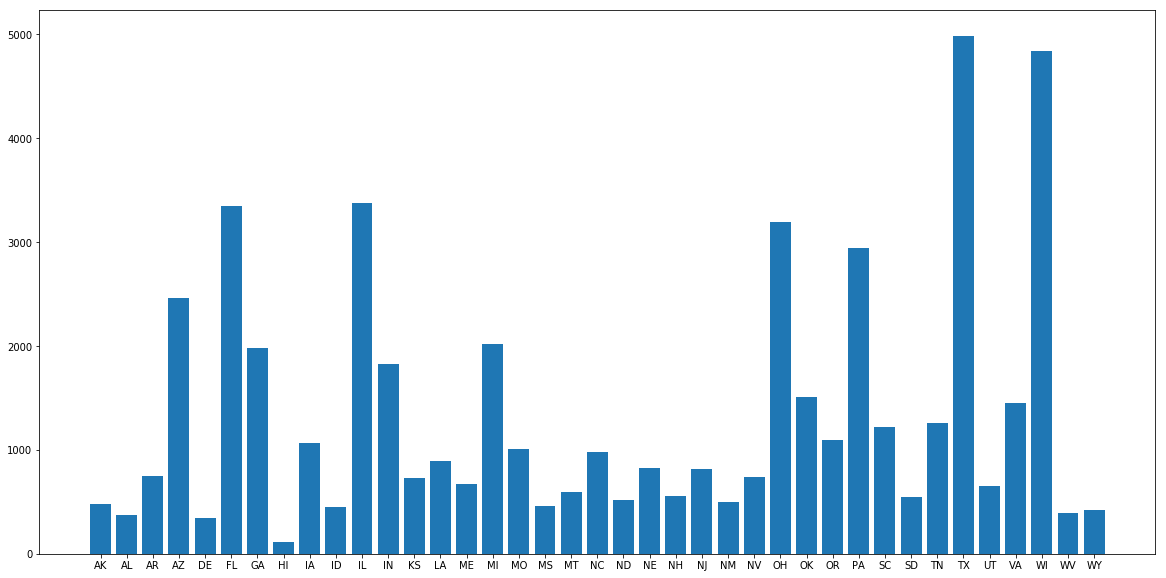

In [23]:
res = pd.read_sql("""SELECT COUNT(DISTINCT(PlanId)) AS Plans, Statecode
                    FROM PlanAttributes
                    WHERE BusinessYear = 2016
                    GROUP BY Statecode; """,conn)

plt.figure(figsize=(20,10))
plt.bar(res['StateCode'],res['Plans'])

<BarContainer object of 38 artists>

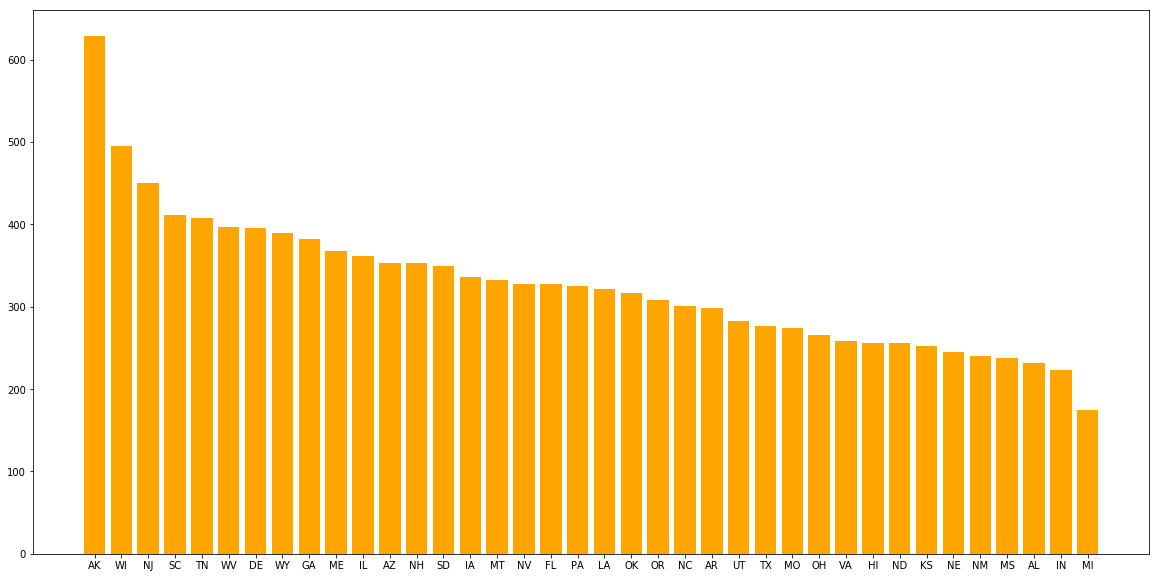

In [36]:
res = pd.read_sql("""select statecode, avg(individualrate) as rate_ave
                        from rate 
                        where businessyear = 2016
                        group by statecode
                        order by rate_ave desc;""", conn)

plt.figure(figsize=(20,10))
plt.bar(res['StateCode'],res['rate_ave'],color="orange")

In [37]:
res = pd.read_sql("""select count(distinct(planid)) as plans, benefitname
                      from benefitscostsharing
                      where businessyear = 2016
                      group by benefitname
                      order by plans desc""", conn)
res

,plans,BenefitName
0,27381,Accidental Dental
1,27381,Basic Dental Care - Adult
2,27381,Basic Dental Care - Child
3,27381,Dental Check-Up for Children
4,27381,Major Dental Care - Adult
5,27381,Major Dental Care - Child
6,27381,Orthodontia - Adult
7,27381,Orthodontia - Child
8,27381,Routine Dental Services (Adult)
9,23544,Treatment for Temporomandibular Joint Disorders


PlanIds across Rate, PlanAttributes and BenefitsCostSharing table are different in the extension '-xx'. For Joins, we will consider the substring without extension.

In [38]:
res = pd.read_sql("""SELECT PlanId FROM Rate LIMIT 5;""", conn)
res

,PlanId
0,21989AK0010001
1,21989AK0020001
2,21989AK0020001
3,21989AK0010001
4,21989AK0010001


In [39]:
res = pd.read_sql("""SELECT PlanId FROM BenefitsCostSharing LIMIT 5;""", conn)
res

,PlanId
0,21989AK0010001-00
1,21989AK0010001-00
2,21989AK0010001-00
3,21989AK0010001-00
4,21989AK0010001-00


In [40]:
res = pd.read_sql("""SELECT PlanId FROM PlanAttributes LIMIT 5;""", conn)
res

,PlanId
0,21989AK0020002-01
1,21989AK0020001-00
2,21989AK0010001-00
3,21989AK0010001-01
4,21989AK0020001-01


Analyzing the dental plan statistics for year 2016:

In [ ]:
res = pd.read_sql("""select rate.statecode, avg(rate.individualrate) as dental_rate
                            from rate
                            inner join planattributes on rate.planid=substr(planattributes.planid, 1,14)
                            where planattributes.dentalonlyplan='Yes' and rate.individualrate !=999999 
                            and rate.businessyear = 2016
                            group by rate.statecode
                            order by rate.statecode;""", conn)
fig, ax=plt.subplots(figsize=[20, 5])
sns.barplot(x='statecode', y='dental_rate', data=res)

Age vs. rate analysis over all the plans:

In [ ]:
res = pd.read_sql("""select avg(individualrate) as rate, age
                        from rate
                        where individualrate !=999999
                        and businessyear = 2016
                        group by age
                        ;""", conn)

fig, ax=plt.subplots(figsize=[20, 5])
sns.barplot(x='Age', y='rate', data=rate_age)